<a href="https://colab.research.google.com/github/Carol-Kelly/Hamoye_Internship/blob/main/StageD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Planet: Understanding the Amazon from Space challenge**

### **Data Source**
This data is sourced from the Kaggle library in the 'Competition' page via the link: https://www.kaggle.com/c/planet-understanding-the-amazon-from-space

### **Problem Statement**


*   To help the global community better understand where, how, and why deforestation happens all over the world - and ultimately how to respond.
*   To differentiate between human causes of forest loss and natural causes.



In [25]:
import sys
import os
import subprocess

from six import string_types
import math
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import time
import torch
import keras
import tensorflow as tf
from google.colab import drive
tf.keras.preprocessing.image.ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from IPython.display import display
import matplotlib.image as mpimg
from skimage import io
from scipy import ndimage
get_ipython().magic('matplotlib inline')
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.optimizers import Optimizer
tf.keras.layers.BatchNormalization
from PIL import Image
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Sequential
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose, Dense, Dropout, Flatten, GlobalAveragePooling2D
#from keras.applications.resnet50 import *
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from keras.optimizers import adam_v2

In [2]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
!unzip '/content/drive/My Drive/archive_planet_data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test-jpg-additional/test-jpg-additional/file_5499.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_55.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_550.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5500.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5501.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5502.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5503.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5504.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5505.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5506.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5507.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5508.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5509.jpg  
  inflating: test-jpg-additional/test-jpg-additional/fi

In [4]:
root_path = '/content/planet/planet/'
csv_path = os.path.join(root_path + "train_classes.csv")
train_images = os.path.join(root_path + "train-jpg")
test_images = os.path.join(root_path + "test-jpg")

In [5]:
df_train = pd.read_csv(csv_path)
df_train.shape

(40479, 2)

In [6]:
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40479 entries, 0 to 40478
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  40479 non-null  object
 1   tags        40479 non-null  object
dtypes: object(2)
memory usage: 632.6+ KB


#### **Data Exploration**

In [8]:
import re

labels = df_train['tags']

def valueSearch(pattern):
    count = []
    num = 0
    for label in labels:
        x = re.search(pattern, label)
        if x:
            count.append(label)
    for c in count:
        num += 1
    return num

def showLabels(pattern):
    for label in labels:
        x = re.search(pattern, label)
        if x:
            print(label)

In [9]:
# check out label distribution
showLabels(r"^[\S]+$") # values with one label
showLabels(r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$") # values with six labels
showLabels(r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$") # values with nine labels 

cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy
cloudy

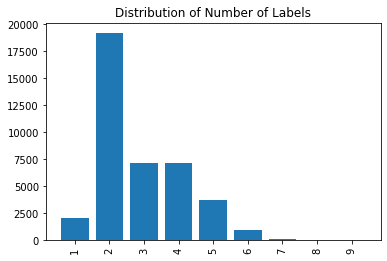

In [10]:
# visualize label distribution
patternList = [r"^[\S]+$", r"^[^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$",
              r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", ]
    
valueList = []
chartLabels = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

for p in patternList:
    valueList.append(valueSearch(p))

fig, ax = plt.subplots()
ax.bar(chartLabels, valueList)
ax.set_xticklabels(chartLabels, rotation=90)
plt.title("Distribution of Number of Labels")
plt.show()

It can be seen from the visualization that this dataset does not contain any images that have more than nine labels; of which, most images contain two labels

In [11]:
# Build list with unique labels
label_list = []
for tag_str in df_train.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)

In [12]:
# Add onehot features for every label
for label in label_list:
    df_train[label] = df_train['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
df_train.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


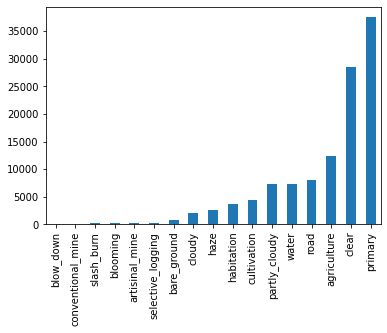

In [13]:
# visualize class distribution too
df_train[label_list].sum().sort_values().plot.bar()  # bar chart of label instances

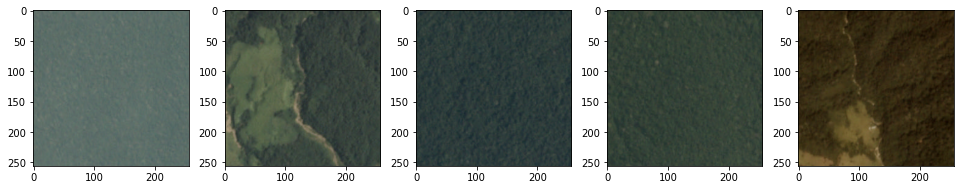

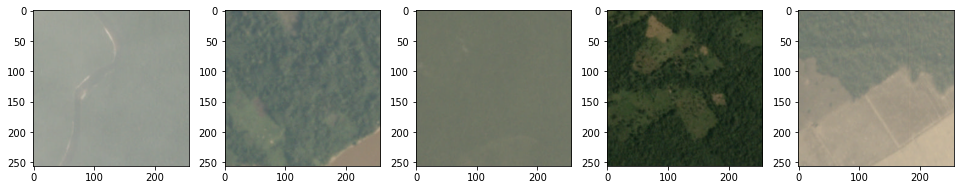

In [14]:
# visualize some images

def showImages(imgid,imgid2, imgid3, imgid4, imgid5):
    plt.figure(figsize=(20,20))
    plt.subplot(6,6,1)
    img = cv2.imread(train_images + "/train_" + imgid)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.subplot(6,6,1+1)
    img2 = cv2.imread(train_images + "/train_" + imgid2)  
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    plt.subplot(6, 6,1+2)
    img3 = cv2.imread(train_images + "/train_" + imgid3)
    img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
    plt.imshow(img3)
    plt.subplot(6, 6, 1+3)
    img4 = cv2.imread(train_images + "/train_" + imgid4)
    img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
    plt.imshow(img4)
    plt.subplot(6, 6, 1+4)
    img5 = cv2.imread(train_images + "/train_" + imgid5)
    img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
    plt.imshow(img5)
    
showImages("0.jpg", "1.jpg", "2.jpg", "3.jpg", "4.jpg")
showImages("5.jpg", "6.jpg", "7.jpg", "8.jpg", "9.jpg")

#### **Image Preprocessing**

Improve on hazy images

In [15]:
# Single image haze removal using dark channel prior
class Node(object):
    def __init__(self,x,y,value):
        self.x = x
        self.y = y
        self.value = value

    def printInfo(self):
        print('%s:%s:%s' %(self.x,self.y,self.value))
        
def getMinChannel(img):

    if len(img.shape)==3 and img.shape[2]==3:
        pass
    else:
      print("bad image shape, input must be color image")
      return None
    
    return np.min(img, axis=2)
   
def getDarkChannel(img,blockSize = 3):

    if len(img.shape)==2:
        pass
    else:
        print("bad image shape, input image must be two demensions")
        return None

        # blockSize
    if blockSize % 2 == 0 or blockSize < 3:
        print('blockSize is not odd or too small')
        return None

    # addSize
    A = int((blockSize-1)/2) #AddSize

    #New height and new width
    H = img.shape[0] + blockSize - 1
    W = img.shape[1] + blockSize - 1

    
    imgMiddle = 255 * np.ones((H,W))    

    imgMiddle[A:H-A, A:W-A] = img
    
    imgDark = np.zeros_like(img, np.uint8)    
    
    localMin = 255
    for i in range(A, H-A):
        for j in range(A, W-A):
            x = range(i-A, i+A+1)
            y = range(j-A, j+A+1)
            imgDark[i-A,j-A] = np.min(imgMiddle[x,y])                            
            
    return imgDark

def getAtomsphericLight(darkChannel,img,meanMode = False, percent = 0.001):

    size = darkChannel.shape[0]*darkChannel.shape[1]
    height = darkChannel.shape[0]
    width = darkChannel.shape[1]

    nodes = []

    # (list)
    for i in range(0,height):
        for j in range(0,width):
            oneNode = Node(i,j,darkChannel[i,j])
            nodes.append(oneNode)	

    nodes = sorted(nodes, key = lambda node: node.value,reverse = True)

    atomsphericLight = 0

    if int(percent*size) == 0:
        for i in range(0,3):
            if img[nodes[0].x,nodes[0].y,i] > atomsphericLight:
              atomsphericLight = img[nodes[0].x,nodes[0].y,i]
        return atomsphericLight

    if meanMode:
        sum = 0
        for i in range(0,int(percent*size)):
            for j in range(0,3):
                sum = sum + img[nodes[i].x,nodes[i].y,j]
        atomsphericLight = int(sum/(int(percent*size)*3))
        return atomsphericLight

    # 0.1%(percent)
    for i in range(0,int(percent*size)):
        for j in range(0,3):
            if img[nodes[i].x,nodes[i].y,j] > atomsphericLight:
                atomsphericLight = img[nodes[i].x,nodes[i].y,j]
    return atomsphericLight

def getRecoverScene(img, omega=0.95, t0=0.1, blockSize=15, meanMode=False, percent=0.001, refine=True):

    imgGray = getMinChannel(img)
    imgDark = getDarkChannel(imgGray, blockSize = blockSize)
    atomsphericLight = getAtomsphericLight(imgDark,img,meanMode = meanMode,percent= percent)

    imgDark = np.float64(imgDark)
    transmission = 1 - omega * imgDark / atomsphericLight

  
    transmission[transmission<0.1] = 0.1     
    
    if refine:        
      normI = (img - img.min()) / (img.max() - img.min())  # normalize

      transmission = guided_filter(normI, transmission, r=40, eps=1e-3)

      sceneRadiance = np.zeros(img.shape)
      img = np.float64(img)
    
    for i in range(3):        
        SR = (img[:,:,i] - atomsphericLight)/transmission + atomsphericLight

      # 0～255                  
        SR[SR>255] = 255
        SR[SR<0] = 0                    
        sceneRadiance[:,:,i] = SR  
            
        sceneRadiance = np.uint8(sceneRadiance)

    return sceneRadiance

The guided-filter helps to damp down the artefacts when the Dark-channel prior filter is applied to an image

In [16]:
"""Implementation for Guided Image Filtering
Reference:
http://research.microsoft.com/en-us/um/people/kahe/eccv10/
"""

from itertools import combinations_with_replacement
from collections import defaultdict
from numpy.linalg import inv

R, G, B = 0, 1, 2  # index for convenience

def boxfilter(I, r):
    """Fast box filter implementation.
    Parameters
    ----------
    I:  a single channel/gray image data normalized to [0.0, 1.0]
    r:  window radius
    Return
    -----------
    The filtered image data.
    """        
    M, N = I.shape
    dest = np.zeros((M, N))

    # cumulative sum over Y axis
    sumY = np.cumsum(I, axis=0)
    # difference over Y axis
    dest[:r + 1] = sumY[r: 2 * r + 1]
    dest[r + 1:M - r] = sumY[2 * r + 1:] - sumY[:M - 2 * r - 1]
    dest[-r:] = np.tile(sumY[-1], (r, 1)) - sumY[M - 2 * r - 1:M - r - 1]

    # cumulative sum over X axis
    sumX = np.cumsum(dest, axis=1)
    # difference over Y axis
    dest[:, :r + 1] = sumX[:, r:2 * r + 1]
    dest[:, r + 1:N - r] = sumX[:, 2 * r + 1:] - sumX[:, :N - 2 * r - 1]
    dest[:, -r:] = np.tile(sumX[:, -1][:, None], (1, r)) - \
        sumX[:, N - 2 * r - 1:N - r - 1]

    return dest


def guided_filter(I, p, r=40, eps=1e-3):
  """Refine a filter under the guidance of another (RGB) image.
    Parameters
    -----------
    I:   an M * N * 3 RGB image for guidance.
    p:   the M * N filter to be guided
    r:   the radius of the guidance
    eps: epsilon for the guided filter
    Return
    -----------
    The guided filter.
    """    
  M, N = p.shape
  base = boxfilter(np.ones((M, N)), r)

  # each channel of I filtered with the mean filter
  means = [boxfilter(I[:, :, i], r) / base for i in range(3)]
  # p filtered with the mean filter
  mean_p = boxfilter(p, r) / base
  # filter I with p then filter it with the mean filter
  means_IP = [boxfilter(I[:, :, i] * p, r) / base for i in range(3)]
  # covariance of (I, p) in each local patch
  covIP = [means_IP[i] - means[i] * mean_p for i in range(3)]

  # variance of I in each local patch: the matrix Sigma in ECCV10 eq.14
  var = defaultdict(dict)
  for i, j in combinations_with_replacement(range(3), 2):
        var[i][j] = boxfilter(
            I[:, :, i] * I[:, :, j], r) / base - means[i] * means[j]

  a = np.zeros((M, N, 3))
  for y, x in np.ndindex(M, N):
      #         rr, rg, rb
      # Sigma = rg, gg, gb
      #         rb, gb, bb
      Sigma = np.array([[var[R][R][y, x], var[R][G][y, x], var[R][B][y, x]],
                          [var[R][G][y, x], var[G][G][y, x], var[G][B][y, x]],
                          [var[R][B][y, x], var[G][B][y, x], var[B][B][y, x]]])
      cov = np.array([c[y, x] for c in covIP])
      a[y, x] = np.dot(cov, inv(Sigma + eps * np.eye(3)))  # eq 14

  # ECCV10 eq.15
  b = mean_p - a[:, :, R] * means[R] - \
        a[:, :, G] * means[G] - a[:, :, B] * means[B]

  # ECCV10 eq.16
  q = (boxfilter(a[:, :, R], r) * I[:, :, R] + boxfilter(a[:, :, G], r) *
         I[:, :, G] + boxfilter(a[:, :, B], r) * I[:, :, B] + boxfilter(b, r)) / base

  return q

Let's visualize some hazy images.

For each hazy image, from left to right we will plot the original image, the dark channel prior with refinement, then without. For the satellite images, refinement does not seem to have much impact, but it definitely helps to reduce artefacts in general

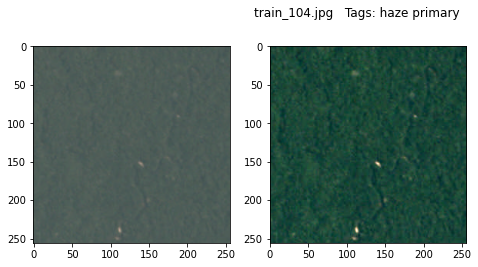

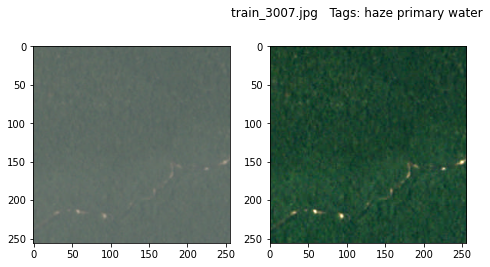

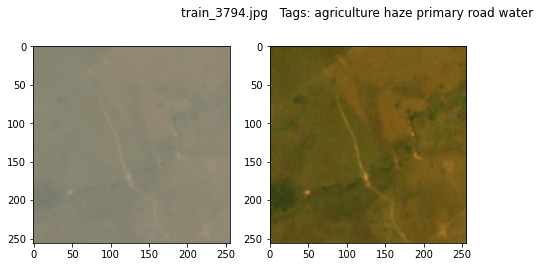

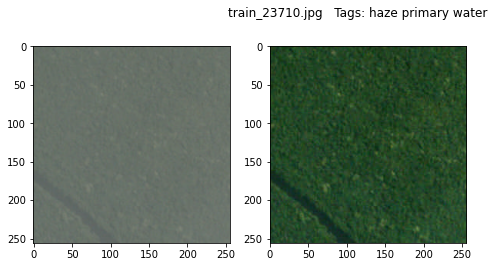

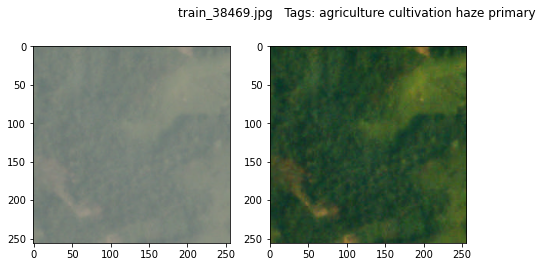

In [17]:
Hazy_img_idx = [104, 3007, 3794, 23710, 38469]

for i in Hazy_img_idx:    
     
    path = '/content/planet/planet/train-jpg/'
    filename = 'train_{}.jpg'.format(i)
    img = cv2.imread(path+filename)  #0-255    
    
    dehazed_img1 = getRecoverScene(img, refine=True)
    #dehazed_img2 = getRecoverScene(img, refine=False)

    fig = plt.figure()
    fig.set_size_inches(12, 4)
    fig.suptitle(filename + '   Tags: ' + df_train['tags'][i], fontsize=12)

    plt.subplot(131)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.subplot(132)
    plt.imshow(cv2.cvtColor(dehazed_img1, cv2.COLOR_BGR2RGB))
    
    #plt.subplot(133)
    #plt.imshow(cv2.cvtColor(dehazed_img2, cv2.COLOR_BGR2RGB))
    
    plt.show()

### **Model Building**

In [18]:
import glob
train_data = []
for filename in glob.glob('/content/planet/planet/train-jpg/*.jpg'): 
    im=Image.open(filename)
    img = im.resize((64, 64))
    train_data.append(img)

In [19]:
#convert the test images to pixels and resize them as well
test_data=[]
for filename in glob.glob('/content/planet/planet/test-jpg/*.jpg'):
  im=Image.open(filename)
  img = im.resize((64, 64))
  test_data.append(img)
for filename in glob.glob('/content/planet/test-jpg-additional/*.jpg'):
  im=Image.open(filename)
  img = im.resize((64, 64))
  test_data.append(img)

In [43]:
df = pd.read_csv(csv_path)

In [44]:
l = set()

for tag in df['tags'].values:
    labels = tag.split(' ')
    l.update(labels)
    
print(l)

{'agriculture', 'haze', 'primary', 'bare_ground', 'selective_logging', 'clear', 'road', 'cloudy', 'blooming', 'slash_burn', 'habitation', 'blow_down', 'artisinal_mine', 'conventional_mine', 'partly_cloudy', 'water', 'cultivation'}


In [46]:
def loadImages(imgsize):
    
    imgs = []
    x = []
    
    imgCount = 0
    
    for imageids in df['image_name'].values:
        if imgCount < 10000:
            images = os.path.join(train_images + "/" + imageids + ".jpg")
            imgs.append(images)
            imgCount += 1

    for path in imgs:
        img = cv2.imread(path)
        img = cv2.resize(img, (imgsize, imgsize))
        x.append(img)

    x = np.array(x, dtype=np.float32) / 255
    
    return x

X = loadImages(128)

In [47]:
X.shape

(10000, 128, 128, 3)

In [48]:
def loadLabels(category):
    feature = []
    for tags in df['tags'].values:
        tags = tags.split(' ')
        if category in tags:
            feature.append(1)
        else:
            feature.append(0)
    return feature

In [ ]:
def createFeatures(l):
    for col in l:
        df[col] = loadLabels(col)
    return df

df = createFeatures(l)

In [49]:
def extractLabels(df):
    df = df.drop(columns=['image_name', 'tags'])
    df = df.drop(labels=range(10000, 40479), axis=0)
    df = df.to_numpy()
    return df

y = extractLabels(df)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Baseline

In [64]:
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
def prepare_model():

  #kfold_weights_path = os.path.join('', 'weights_kfold_' + '.h5')
  model = Sequential()
  #model.add(BatchNormalization(input_shape=(128, 128,3)))
  model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='relu'))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
        
  model.add(Conv2D(256, kernel_size=(3, 3),padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
        
  model.add(Conv2D(512, kernel_size=(3, 3),padding='same', activation='relu'))
  model.add(Conv2D(512, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
        
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  #model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(17, activation='sigmoid'))

  return model

In [65]:
epochs = 20
learn_rate = 0.01
opt  = adam_v2.Adam(learning_rate=learn_rate)
model = prepare_model()
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, restore_best_weights=True)

In [66]:
model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_data=(x_test, y_test), callbacks=callbacks)

Epoch 1/20


ValueError: ignored

In [ ]:
p_val = model.predict(x_test, batch_size = 32, verbose=2)

Model Evaluatuion

In [ ]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)